# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | buka
Processing Record 2 of Set 1 | nelson bay
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | puerto aysen
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | nova vicosa
Processing Record 10 of Set 1 | uturoa
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | leava
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | vila franca do campo
Processing Record 17 of Set 1 | dudinka
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | rikaze
Processing Record 20 of Set 1 | gadzhiyevo
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1

Processing Record 35 of Set 4 | kupang
Processing Record 36 of Set 4 | selfoss
Processing Record 37 of Set 4 | kourou
Processing Record 38 of Set 4 | arenapolis
Processing Record 39 of Set 4 | sonoita
Processing Record 40 of Set 4 | constantia
Processing Record 41 of Set 4 | jakar
Processing Record 42 of Set 4 | carutapera
Processing Record 43 of Set 4 | usogorsk
Processing Record 44 of Set 4 | dhuusamarreeb
Processing Record 45 of Set 4 | nadym
Processing Record 46 of Set 4 | guasdualito
Processing Record 47 of Set 4 | alvaraes
Processing Record 48 of Set 4 | dadukou
Processing Record 49 of Set 4 | benguela
Processing Record 0 of Set 5 | tazovsky
Processing Record 1 of Set 5 | jamestown
Processing Record 2 of Set 5 | tsurusaki
Processing Record 3 of Set 5 | ierapetra
Processing Record 4 of Set 5 | i-n-salah
Processing Record 5 of Set 5 | cam ranh
Processing Record 6 of Set 5 | fernley
Processing Record 7 of Set 5 | huayin
Processing Record 8 of Set 5 | chonchi
Processing Record 9 of S

Processing Record 22 of Set 8 | mejit
Processing Record 23 of Set 8 | tamanrasset
Processing Record 24 of Set 8 | mukah
City not found. Skipping...
Processing Record 25 of Set 8 | sao jose da coroa grande
Processing Record 26 of Set 8 | badnawar
Processing Record 27 of Set 8 | holualoa
Processing Record 28 of Set 8 | mount gambier
Processing Record 29 of Set 8 | luanda
Processing Record 30 of Set 8 | kharabali
Processing Record 31 of Set 8 | polyarnyy
Processing Record 32 of Set 8 | pangody
Processing Record 33 of Set 8 | paysandu
Processing Record 34 of Set 8 | bismarck
Processing Record 35 of Set 8 | newman
Processing Record 36 of Set 8 | mandimba
City not found. Skipping...
Processing Record 37 of Set 8 | kuta
Processing Record 38 of Set 8 | sandnessjoen
Processing Record 39 of Set 8 | weno
Processing Record 40 of Set 8 | quellon
Processing Record 41 of Set 8 | st. paul
Processing Record 42 of Set 8 | singaraja
Processing Record 43 of Set 8 | kingston
Processing Record 44 of Set 8 |

Processing Record 16 of Set 12 | chirilagua
Processing Record 17 of Set 12 | quepos
Processing Record 18 of Set 12 | puerto baquerizo moreno
Processing Record 19 of Set 12 | castelldefels
Processing Record 20 of Set 12 | mont-laurier
Processing Record 21 of Set 12 | boguchany
Processing Record 22 of Set 12 | jaru
Processing Record 23 of Set 12 | oral
Processing Record 24 of Set 12 | ta`u
Processing Record 25 of Set 12 | baiti
Processing Record 26 of Set 12 | carnarvon
Processing Record 27 of Set 12 | vrontados
Processing Record 28 of Set 12 | auki
Processing Record 29 of Set 12 | dunay
Processing Record 30 of Set 12 | mbeya
Processing Record 31 of Set 12 | simanggang
Processing Record 32 of Set 12 | sambava
Processing Record 33 of Set 12 | tabou
Processing Record 34 of Set 12 | kati
Processing Record 35 of Set 12 | fyodorovka
Processing Record 36 of Set 12 | dourbali
Processing Record 37 of Set 12 | yazd
Processing Record 38 of Set 12 | port hedland
Processing Record 39 of Set 12 | sil

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,buka,40.8108,69.1986,2.32,82,100,3.22,UZ,1705274486
1,nelson bay,-32.7167,152.1500,24.49,80,75,8.05,AU,1705274486
2,albany,42.6001,-73.9662,-3.92,58,39,0.89,US,1705274192
3,bilibino,68.0546,166.4372,-33.72,100,99,1.42,RU,1705274486
4,edinburgh of the seven seas,-37.0676,-12.3116,15.66,88,98,3.32,SH,1705274487


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,buka,40.8108,69.1986,2.32,82,100,3.22,UZ,1705274486
1,nelson bay,-32.7167,152.1500,24.49,80,75,8.05,AU,1705274486
2,albany,42.6001,-73.9662,-3.92,58,39,0.89,US,1705274192
3,bilibino,68.0546,166.4372,-33.72,100,99,1.42,RU,1705274486
4,edinburgh of the seven seas,-37.0676,-12.3116,15.66,88,98,3.32,SH,1705274487


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

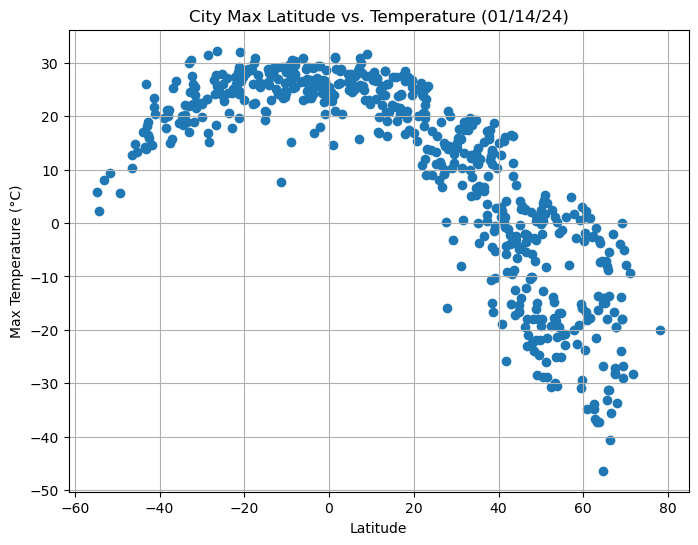

In [14]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%x"))  # Use current date for title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot


plt.show()

#### Latitude Vs. Humidity

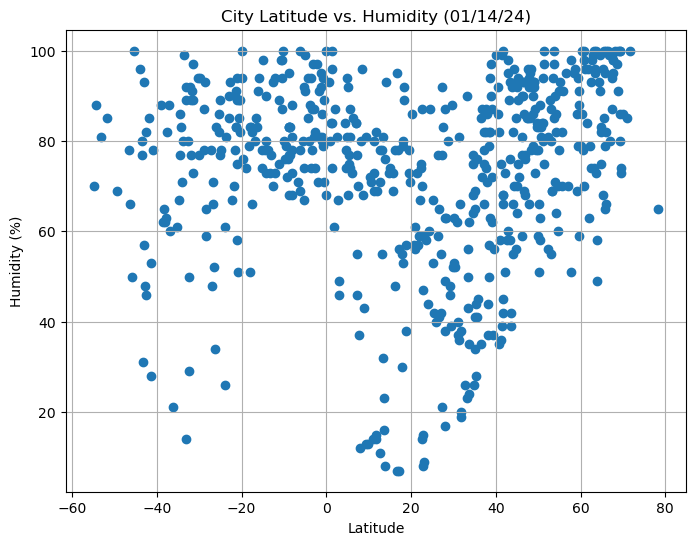

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))  # Use current date for title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

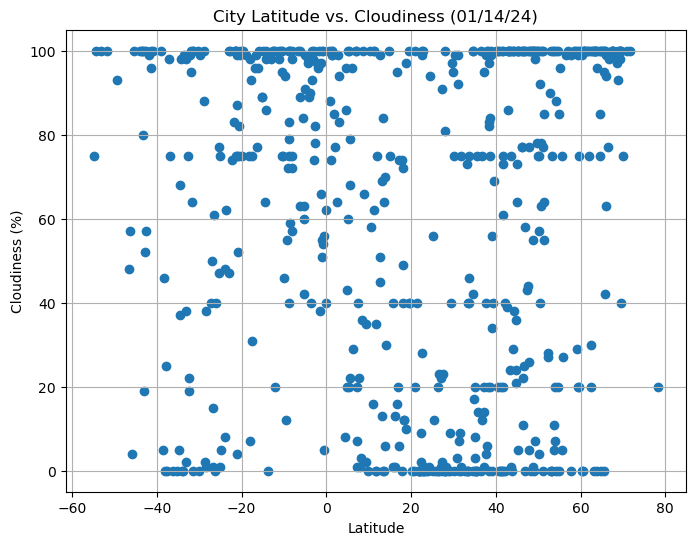

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))  # Use current date for title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

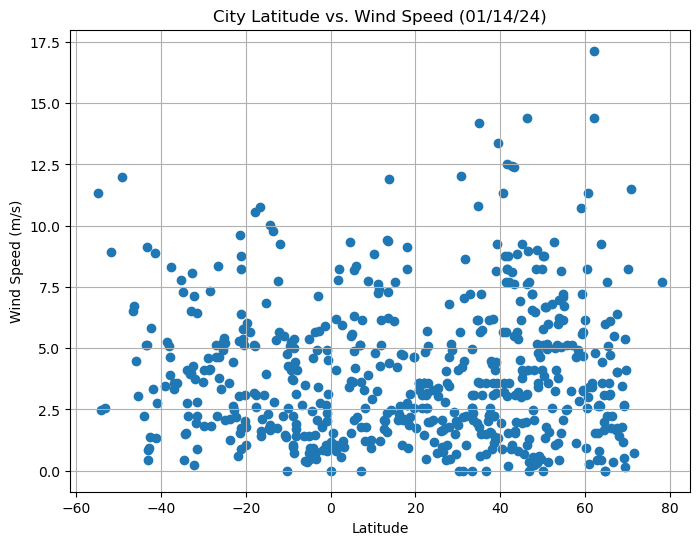

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))  # Use current date for title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
def linear_regression_plot(x, y, hemisphere, x_label, y_label):
    # Create scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label='Data Points')
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Create regression line
    reg_line = slope * x + intercept
    plt.plot(x, reg_line, color='red', label=f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}\nR-value: {r_value:.2f}')
    
    # Set labels and title
    plt.title(f'{hemisphere} Hemisphere: {y_label} vs. {x_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Add legend
    plt.legend()
    
    # Show plot
    plt.show()

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,buka,40.8108,69.1986,2.32,82,100,3.22,UZ,1705274486
2,albany,42.6001,-73.9662,-3.92,58,39,0.89,US,1705274192
3,bilibino,68.0546,166.4372,-33.72,100,99,1.42,RU,1705274486
15,vila franca do campo,37.7167,-25.4333,16.23,87,99,1.56,PT,1705274489
16,dudinka,69.4058,86.1778,-29.07,80,100,5.36,RU,1705274269


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nelson bay,-32.7167,152.1500,24.49,80,75,8.05,AU,1705274486
4,edinburgh of the seven seas,-37.0676,-12.3116,15.66,88,98,3.32,SH,1705274487
5,puerto aysen,-45.4000,-72.7000,13.31,100,100,3.06,CL,1705274254
6,port alfred,-33.5906,26.8910,18.99,99,99,2.24,ZA,1705274487
7,invercargill,-46.4000,168.3500,12.79,66,57,6.71,NZ,1705274330


###  Temperature vs. Latitude Linear Regression Plot

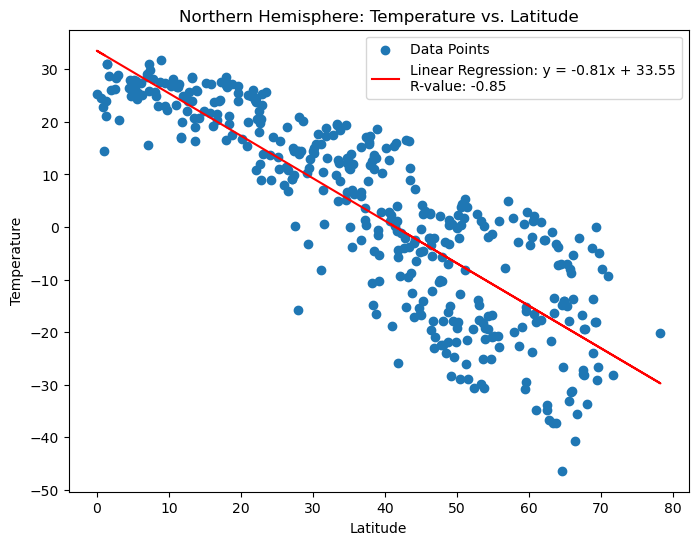

In [26]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Northern', 'Latitude', 'Temperature')

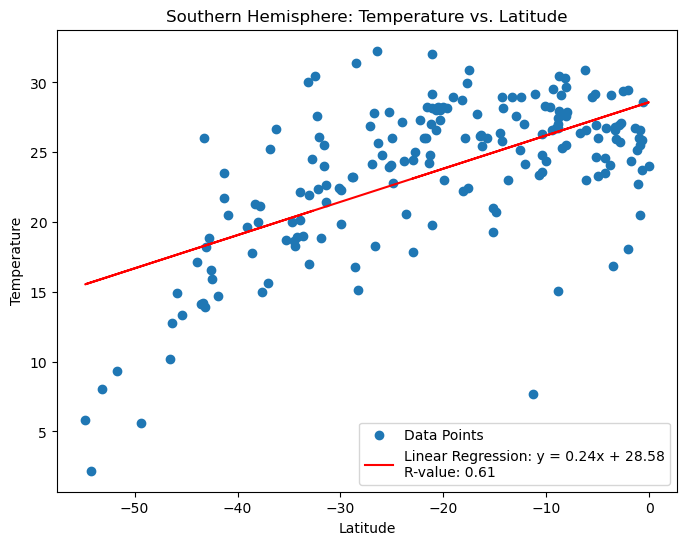

In [27]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Southern', 'Latitude', 'Temperature')


**Discussion about the linear relationship:** 

***Northern Hemisphere:*** there's a strong negative correlation between latitude and temperature. The higher the latitude the lower the temperature.


***Southern Hemisphere*** there's a moderate positive correlation between latitude and temperature. The lower the latitude the the lower the temperature.

### Humidity vs. Latitude Linear Regression Plot

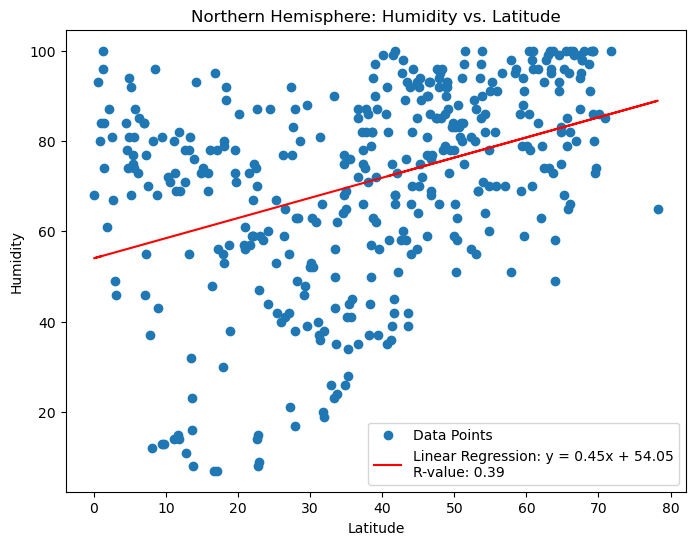

In [34]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Northern', 'Latitude', 'Humidity')


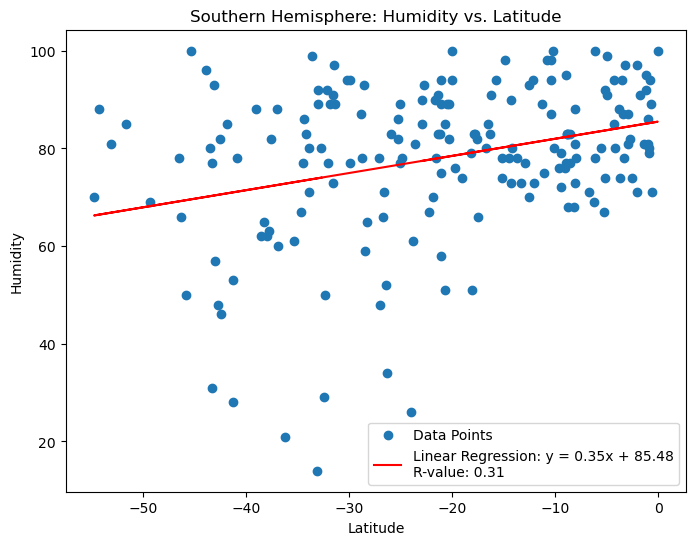

In [35]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Southern', 'Latitude', 'Humidity')


**Discussion about the linear relationship:** there's a weak but positive correlation between latitude and humidity. The highest the latitude the highest the humidity. This is more evident in the northern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

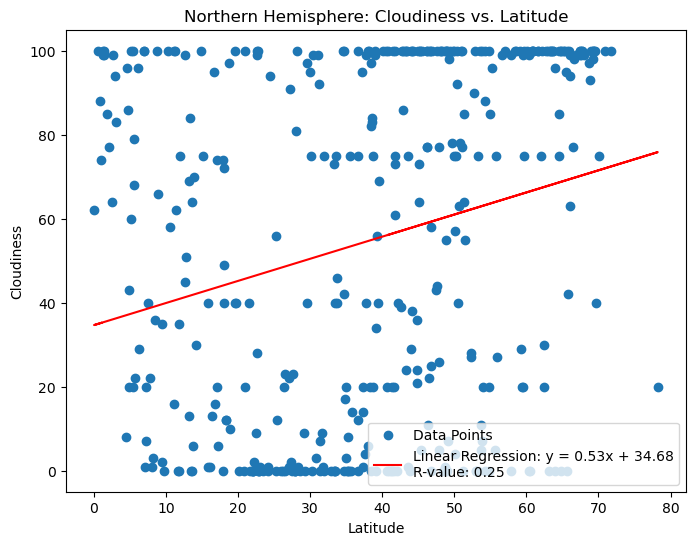

In [36]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Northern', 'Latitude', 'Cloudiness')


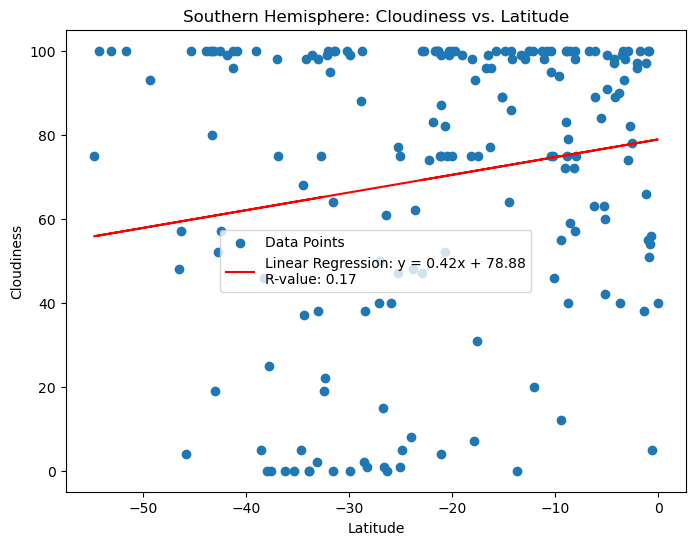

In [37]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Southern', 'Latitude', 'Cloudiness')


**Discussion about the linear relationship:** There's a very week or non-existent relationship between latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

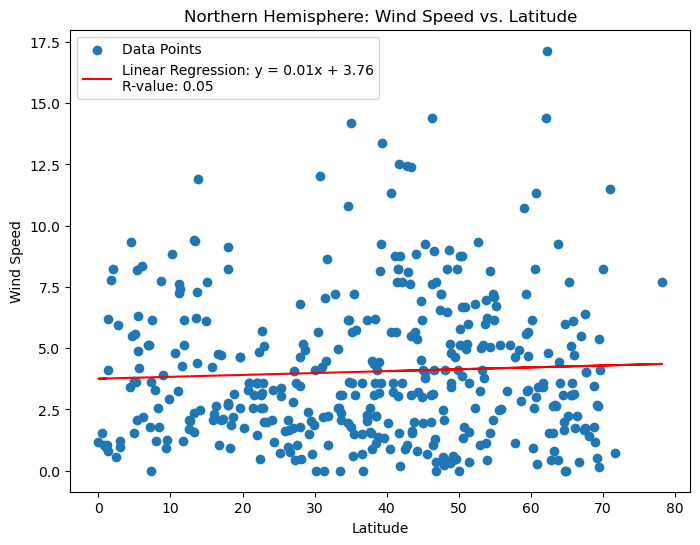

In [38]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Northern', 'Latitude', 'Wind Speed')


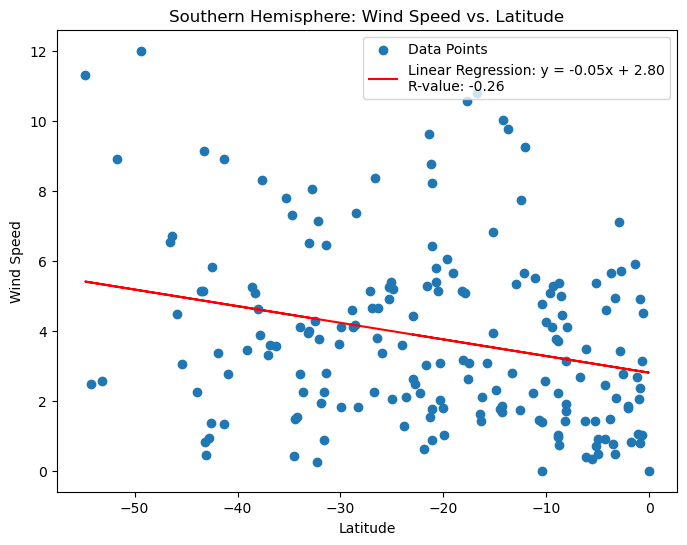

In [39]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Southern', 'Latitude', 'Wind Speed')


**Discussion about the linear relationship:**  There's a very week or non-existent relationship between latitude and cloudiness. 